In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(42)
n_samples = 300
n_outliers = 15

# Нормальные данные
X_normal = np.random.normal(loc=50, scale=10, size=(n_samples, 2))

# Искусственные выбросы
X_outliers = np.random.uniform(low=10, high=90, size=(n_outliers, 2))

# Объединение данных
X = np.concatenate([X_normal, X_outliers], axis=0)
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['is_outlier'] = [0] * n_samples + [1] * n_outliers


In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score

def evaluate_model(model, X, true_outliers):
    """
    Функция для оценки работы модели.
    """
    # Получение предсказаний модели
    if hasattr(model, 'fit_predict'):
        preds = model.fit_predict(X)
    else:
        preds = model.fit(X).predict(X)

    # В алгоритмах DBSCAN и LOF выбросы обозначаются как -1
    if preds.min() == -1:
        preds = (preds == -1).astype(int)
    else:
        preds = (preds == 1).astype(int)

    # Оценка точности и полноты
    precision = precision_score(true_outliers, preds)
    recall = recall_score(true_outliers, preds)
    return precision, recall

# Обучающие модели
models = {
    'Isolation Forest': IsolationForest(contamination=0.05, random_state=42),
    'DBSCAN': DBSCAN(eps=3, min_samples=5),
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination=0.05),
    'KMeans': KMeans(n_clusters=2, random_state=42)
}

# Истинные метки выбросов
true_outliers = df['is_outlier'].values
X_data = df[['feature_1', 'feature_2']].values

# Сравнение алгоритмов
results = []
for model_name, model in models.items():
    precision, recall = evaluate_model(model, X_data, true_outliers)
    results.append({'Model': model_name, 'Precision': precision, 'Recall': recall})

# Результаты в DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                  Model  Precision    Recall
0      Isolation Forest   0.500000  0.533333
1                DBSCAN   0.180328  0.733333
2  Local Outlier Factor   0.500000  0.533333
3                KMeans   0.039106  0.466667


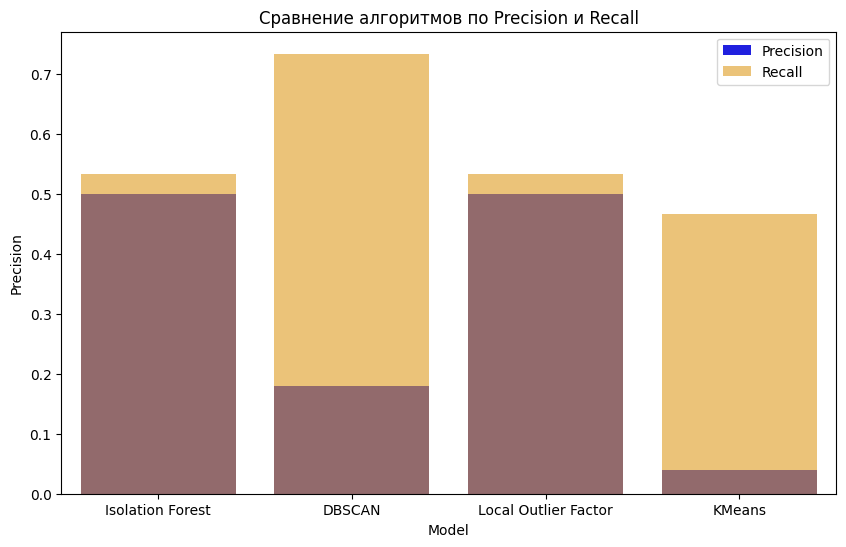

In [5]:
import seaborn as sns

# Построение графика для наглядного сравнения
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=results_df, color='blue', label='Precision')
sns.barplot(x='Model', y='Recall', data=results_df, color='orange', label='Recall', alpha=0.6)
plt.title('Сравнение алгоритмов по Precision и Recall')
plt.legend(loc='upper right')
plt.show()
